In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(),"scripts"))
import numpy as np
import matplotlib.pyplot as plt
import copy
import torch
import pandas as pd

# import scripts
from scripts.exp_plotter import exp_plotter
from scripts.metric import metric
%load_ext autoreload
%autoreload 2

dtype = torch.float

In [44]:
portfolio_num = 7
folder_name = "experiment4"

In [45]:
acqs=[ 
   f"portfolio_{portfolio_num} random_all",
#    f"portfolio_{portfolio_num} random",
   f"portfolio_{portfolio_num} UCBs",
   f"portfolio_{portfolio_num} UCB_EI",
   f"portfolio_{portfolio_num} qKG",
   f"portfolio_{portfolio_num} warmups"]

In [46]:
data = exp_plotter.display_portfolio(folder_name = folder_name, file_name = "all_portfolios", number = portfolio_num)
starting_portfolio = data[0]

not saving unless provide a file_name


##### results

In [47]:
res = exp_plotter.gp_evaluation(folder_name = folder_name, file_name = f"portfolio {portfolio_num}, gp_evaluation_results")
res = sorted(res, key=lambda x:x[-1],reverse = True)[:5]
print("")
print("top 5 choice:")
res

according to log marginal likelihood, the best gp is:

('SE', 'raw', 'ADAM', 0.00392610711666445, 2.395822604497274)

top 5 choice:


[('SE', 'raw', 'ADAM', 0.00392610711666445, 2.395822604497274),
 ('RQ', 'pro', 'quasi_newton', 0.0036911345863093934, 2.3843762079874673),
 ('MA2.5', 'pro', 'quasi_newton', 0.0038751387425387898, 2.3681524197260537),
 ('RQ', 'pro', 'ADAM', 0.003426532493904233, 2.342514673868815),
 ('RQ', 'raw', 'ADAM', 0.003919435936647157, 2.3413850466410318)]

In [48]:
res = exp_plotter.acq_func_portfolio(folder_name = folder_name, file_names = acqs)
print("")
print("all acquisition functions", list(res.keys()))

best acquisition function: UCB_2
best drop %: 29.126%
starting margin $227,011,210
lowest margin $160,891,992
saving margin $66,119,218

all acquisition functions ['random_all', 'UCB_0.1', 'UCB_0.5', 'UCB_1', 'UCB_2', 'UCB_10', 'qUCB_2', 'EI', 'qEI', 'qKG', 'warmup1', 'warmup2']


In [49]:
sorted(exp_plotter.acq_func(res, list(res.keys())), key=lambda x:x[1], reverse=True)[:]

[('UCB_2', 29.125970602035522),
 ('qUCB_2', 28.955137729644775),
 ('warmup1', 28.774356842041016),
 ('UCB_0.5', 28.606629371643066),
 ('UCB_0.1', 28.45199704170227),
 ('UCB_10', 28.345316648483276),
 ('qEI', 28.00113558769226),
 ('EI', 27.84138321876526),
 ('UCB_1', 27.699846029281616),
 ('qKG', 26.879984140396118),
 ('warmup2', 26.55864953994751),
 ('random_all', 25.42758584022522)]

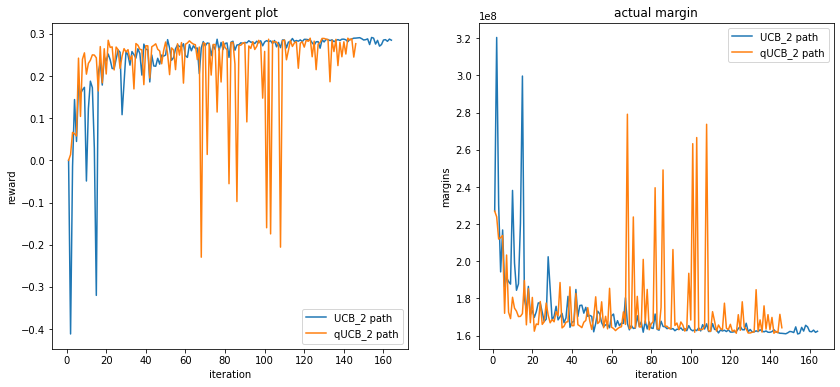

In [50]:
exp_plotter.convergent_plots(res, acq_func_names = ['UCB_2', 'qUCB_2'], turning_point=30, y_axis_lim=None)

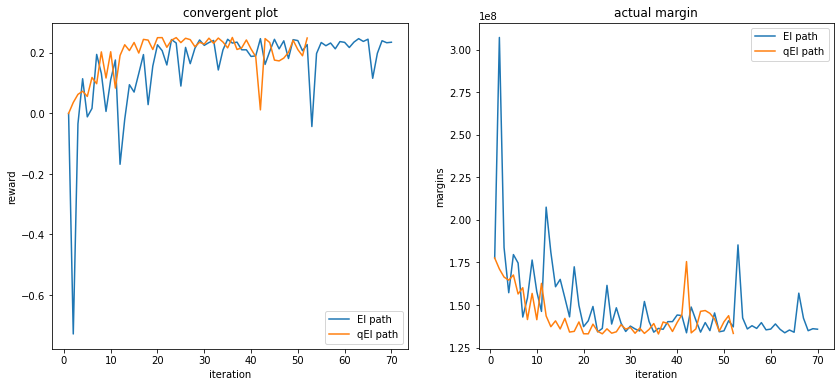

In [21]:
exp_plotter.convergent_plots(res, acq_func_names = ['EI', 'qEI'], turning_point=30, y_axis_lim=None)

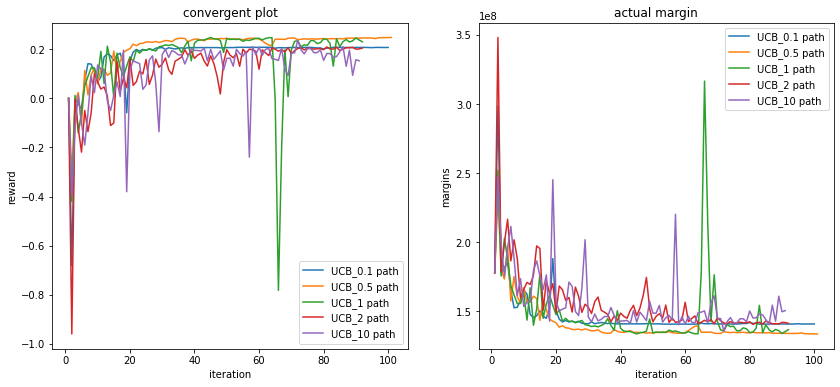

In [22]:
exp_plotter.convergent_plots(res, acq_func_names = ['UCB_0.1', 'UCB_0.5', 'UCB_1', 'UCB_2', 'UCB_10'], turning_point=30, y_axis_lim=None)

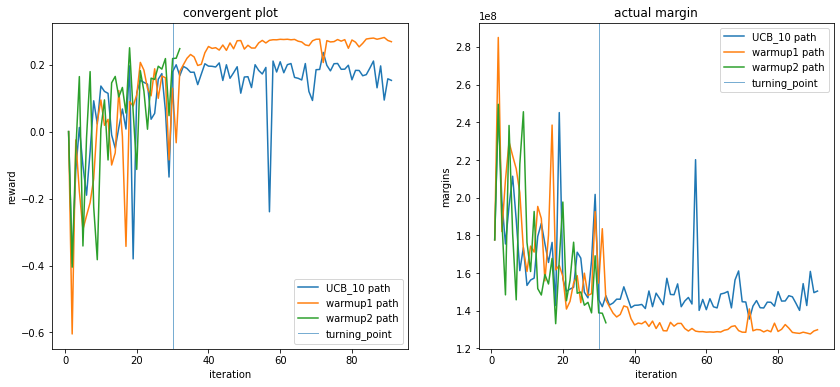

In [23]:
exp_plotter.convergent_plots(res, acq_func_names = ["UCB_10","warmup1","warmup2"], turning_point=30, y_axis_lim=None)

In [47]:
starting_portfolio

,Barclays - F&O Clearing,Barclays - 3952C F&O,BAML - F&O Clearing
BTSU0,3812,3822,1618
DUU0,495,137,3015
IKU0,2227,1319,2473
OATU0,-2005,-4589,-3884
OEU0,4113,3010,1367
RXU0,158,3898,1214
UBU0,-1132,-4035,-659


In [48]:
allocation = exp_plotter.optimal_allocation(res, starting_portfolio)
allocation

,Barclays - F&O Clearing,Barclays - 3952C F&O,BAML - F&O Clearing
BTSU0,2825,5182,1245
DUU0,2124,599,924
IKU0,0,1914,4105
OATU0,-2996,-1756,-5725
OEU0,0,6183,2307
RXU0,0,1820,3450
UBU0,0,-4024,-1802


In [159]:
exp_plotter.query2portfolio(res, starting_portfolio, acq_func_name="EI")

,Barclays - F&O Clearing,Barclays - 3952C F&O,BAML - F&O Clearing
BTSU0,2890,2899,3
DUU0,1724,2221,157
IKU0,4169,2361,2022
OATU0,3642,2323,1661
OEU0,2676,2645,2623
RXU0,4300,2120,1737
UBU0,-2546,-1158,-1183


In [15]:
metric.change_quantity(starting_portfolio, allocation)

,change quantity
BTSU0,1482.5
DUU0,3819.0
IKU0,1594.0
OATU0,6493.0
OEU0,5785.5
RXU0,1310.0
UBU0,1911.0


In [16]:
metric.risk_measurement(allocation)

,Barclays - F&O Clearing,Barclays - 3952C F&O,BAML - F&O Clearing
2_year,10026,9166,10444
5_year,48155,45,0
10_year,-25630,11390,14450
30_year,-78090,-58470,-68520


##### comparing optimal queries

In [160]:
ans = exp_plotter.compare_optimal_query(res)
sorted(ans, key=lambda x:x[-1])[:3]

[('warmup1',
  tensor([0.8099, 0.9990, 0.1420, 0.3089, 0.4989, 0.3676, 0.5051, 0.3477, 0.5764,
          0.4531, 0.5707, 0.4435, 0.5870, 0.5042]),
  0.9892482757568359),
 ('UCB_1',
  tensor([7.4082e-01, 1.0000e+00, 1.0000e-06, 8.8050e-01, 4.7296e-01, 5.5069e-01,
          4.7255e-01, 3.1095e-01, 5.8967e-01, 5.5171e-01, 5.2987e-01, 6.3345e-01,
          5.4777e-01, 6.1040e-01]),
  0.9904665946960449),
 ('UCB_2',
  tensor([0.7616, 0.6144, 0.5142, 0.9990, 0.4539, 0.6105, 0.4905, 0.5704, 0.7618,
          0.8709, 0.3590, 0.5331, 0.4638, 0.5318]),
  0.9905890226364136)]